# **`Dimensionality Reduction-4`**


**Objective**:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Instructions**:
1. Download the wine dataset from the UCI Machine Learning Repository
link(https://archive.ics.uci.edu/ml/datasets/Wine)
2. Load the dataset into a Pandas dataframe.
3. Split the dataset into features and target variables.
4. Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
5. Implement PCA on the preprocessed dataset using the scikit-learn library.
6. Determine the optimal number of principal components to retain based on the explained variance ratio.
7. Visualise the results of PCA using a scatter plot.
8. Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
9. Interpret the results of PCA and clustering analysis.

**Deliverables**:
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.


**Additional Information**:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the info file on the dataset
with open("wine.names","r") as f:
    text = f.read()
    print(text)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [3]:
#importing the data into a dataframe
df = pd.read_csv("wine.data",names=['Cultivars','Alcohol','Malic acid','Ash','Alcalinity of ash',
'Magnesium','Total Phenols','Flavanoids','Nonflavanoid phenols',
'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])

In [4]:
#info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivars                     178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

<Axes: >

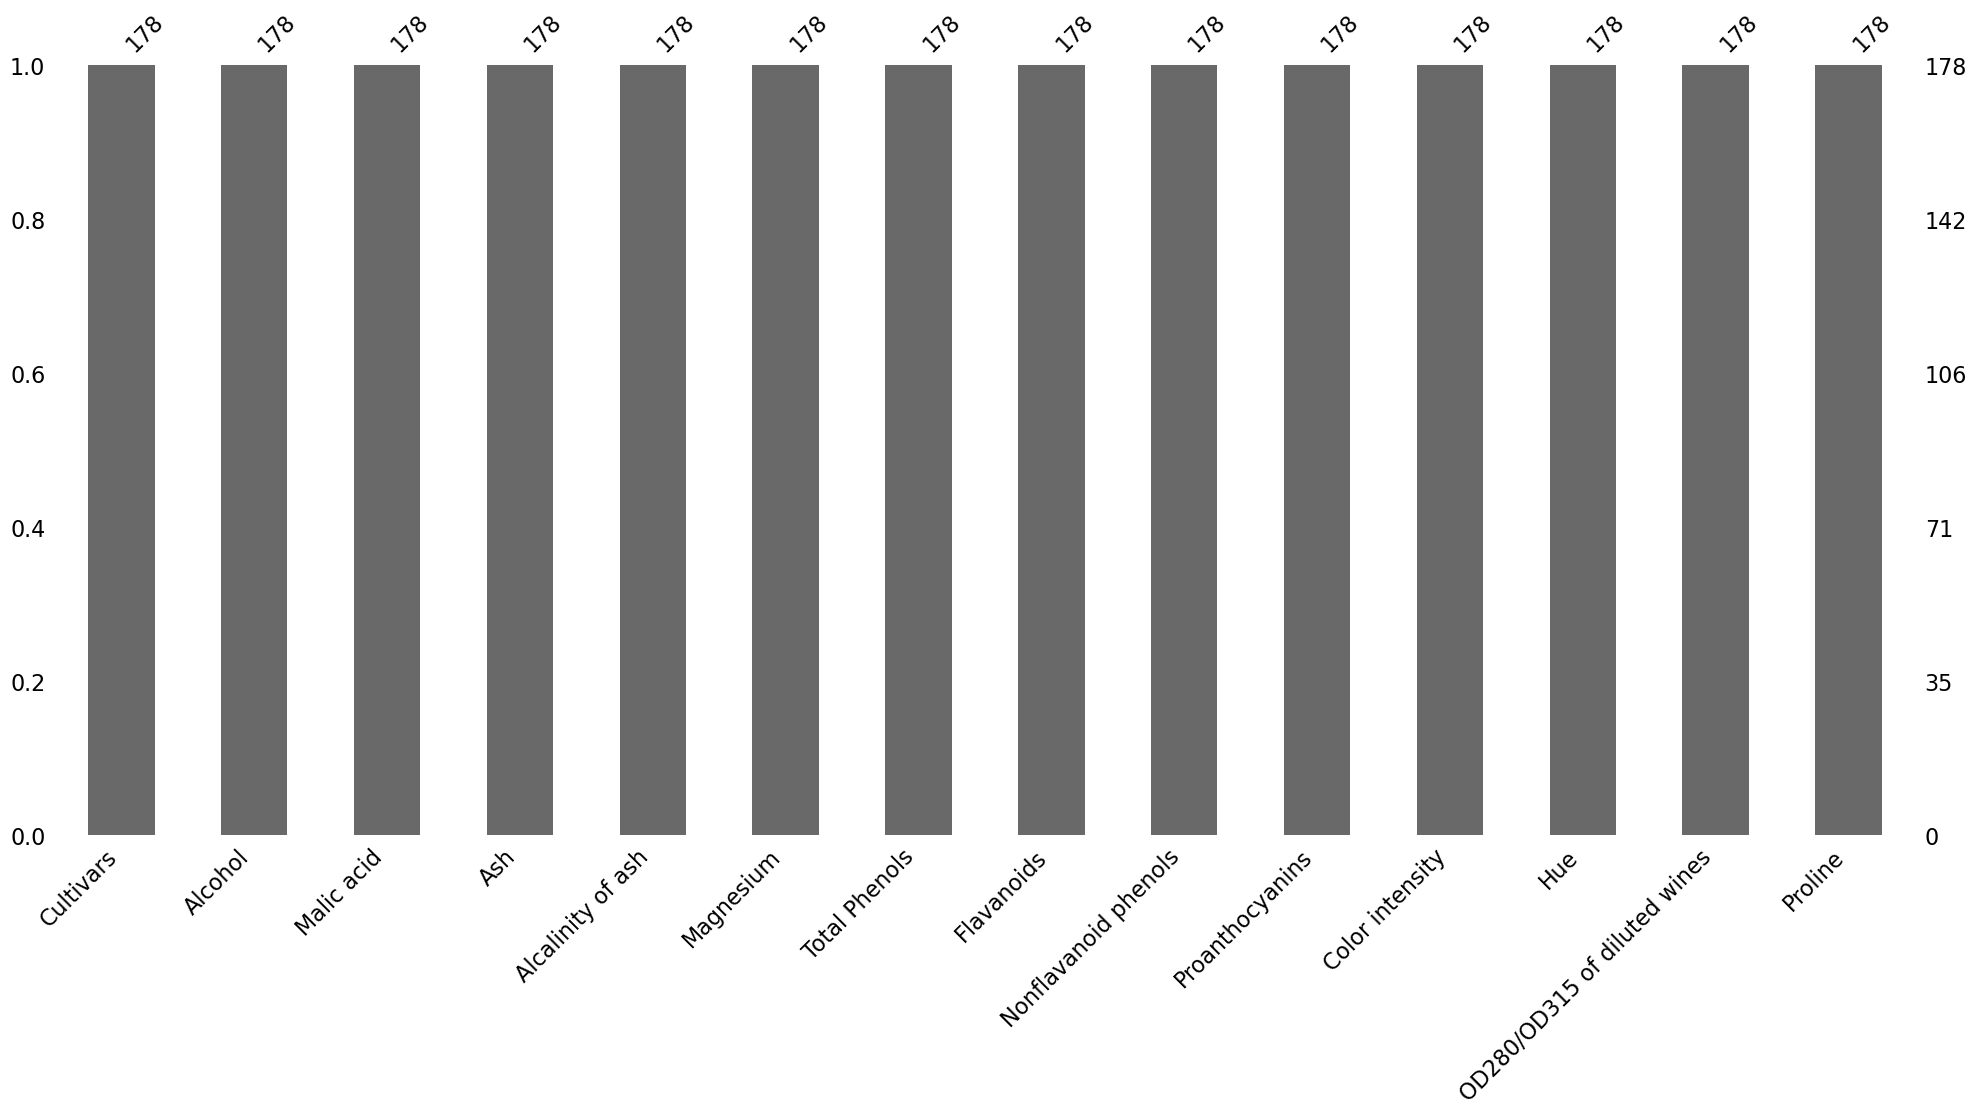

In [5]:
#missing values
import missingno as msno
msno.bar(df)

In [6]:
#seprating the data into features and target
target = "Cultivars"
y = df[target] # target
X = df.drop(target ,axis=1) # features

In [7]:
numerical_cols = X.columns

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 ,random_state=1)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #impute missing values
from sklearn.preprocessing import StandardScaler #standard scaling
from sklearn.compose import ColumnTransformer

In [10]:
## Feature Engineering Automation
num_pipeline = Pipeline(
    steps= [
    ("imputer", SimpleImputer(strategy="mean")), ## missing values
    ("scaler", StandardScaler()), ## feature scaling

    ])

In [11]:
preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,numerical_cols),
])

In [12]:
X_train_transformed  = preprocessor.fit_transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)

In [13]:
#performing PCA to determine the optimal number of principal components
from sklearn.decomposition import PCA

# Fit a PCA model
pca = PCA().fit(X_train_transformed) #using defaults for PCA

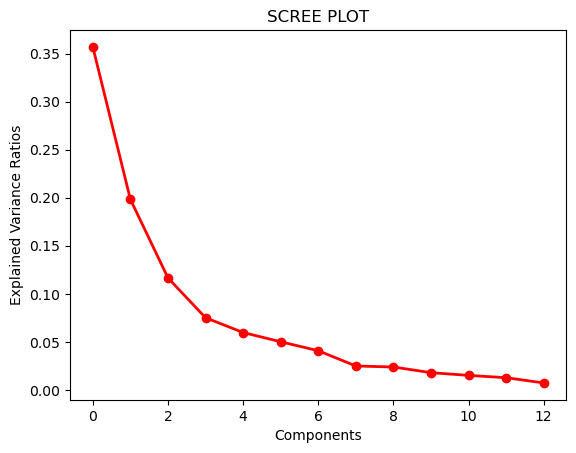

In [14]:
plt.plot(pca.explained_variance_ratio_ ,"ro-", linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratios')
plt.title("SCREE PLOT")
plt.show()

On visual examination the scree plot shows an elbow at around 3 components. Lets analyse this 

In [15]:
variance_ratios = pca.explained_variance_ratio_
variance_ratios

array([0.35684314, 0.19825228, 0.11659894, 0.07517421, 0.05979606,
       0.05018484, 0.04084839, 0.02498555, 0.02392099, 0.01803756,
       0.01520102, 0.01279138, 0.00736563])

From the variance ratios we can calucate the optimal value of n_components by trying to find out upto what value the difference between values is greater than 5% (this is chosen by convention) and it can be calculated as below

In [16]:
n_components  = sum(abs(np.diff(variance_ratios)) > 0.05) + 1

In [17]:
#optimal value of pca is
n_components

3

In [18]:
#variance explained by the pca components is
variance_ratios[:n_components]

array([0.35684314, 0.19825228, 0.11659894])

In [19]:
#retraining the data with number of components = 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

In [20]:
X_train_pca

array([[ 1.45106785e+00,  1.85914043e+00,  8.62277103e-01],
       [-1.16342695e+00,  1.41297331e+00, -2.95352424e-01],
       [ 3.43938612e-01,  1.93870926e+00,  1.34923465e+00],
       [-2.07390734e+00, -1.34699026e+00, -2.25675322e-02],
       [-2.23752594e+00, -1.19567755e+00, -1.01689831e+00],
       [ 7.82847295e-01,  3.04222160e+00, -4.55664618e+00],
       [ 3.43658215e+00, -7.72770226e-01, -3.01649729e-01],
       [-2.62885478e+00, -1.98362772e+00, -3.37010699e-01],
       [-2.80963595e+00, -1.61481530e+00, -6.43425320e-01],
       [-2.20232818e+00, -8.70337555e-02, -6.29021426e-01],
       [-1.31986145e+00,  4.91399537e-01, -1.18936909e+00],
       [-1.97911028e+00, -1.83895989e+00,  1.01413707e+00],
       [-3.61043285e+00, -2.64964226e+00, -5.69984259e-01],
       [-3.22594530e+00, -1.87544577e+00, -3.47722788e-01],
       [ 1.47273339e+00,  1.20679830e+00,  3.42214806e+00],
       [ 2.41322827e+00, -2.10176234e+00, -8.49530086e-01],
       [ 2.72253833e+00, -1.49073541e+00

In [21]:
#Visualzing the results of the pca
x = X_train_pca[:,0]
y = X_train_pca[:,1]
z = X_train_pca[:,2]
px.scatter_3d(x = x,y = y,z = z, color=y_train , title= "PCA components 3d scatter visualization")

In order to perform kmeans clustering on the PCA transformed X variable we need to get the optimal value for k in Kmeans. A good way to find the k-value is using the KELowVisualizer from yellowbrick.cluster

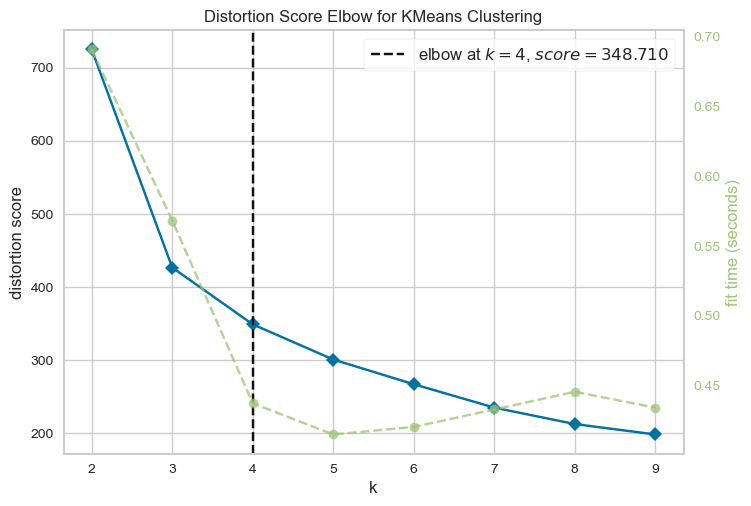

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X = X_train_pca
y = y_train

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Even though the kmeans value predicted by Kmeans Visualizer says 4, by visual inspection  k = 3 also looks much better and we will include k=3 for kmeans clustering

In [ ]:
# Fit K-Means to PCA-transformed data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_train_pca)

In [ ]:
#Visualzing the results of clustering by Kmeans
x = X_train_pca[:,0]
y = X_train_pca[:,1]
z = X_train_pca[:,2]
px.scatter_3d(x = x,y = y,z = z, color=y_kmeans , title = "KMeans clustering results")

To check the performance metrics of K-Means clustering on PCA-transformed data in Python, we can use various evaluation metrics such as the Silhouette Coefficient and the Calinski-Harabasz Index

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score


# Compute Silhouette Coefficient
silhouette_score = silhouette_score(X_train_pca, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_score)

# Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_train_pca, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_score)

Silhouette Coefficient: 0.44384647758457685
Calinski-Harabasz Index: 132.54817809670664


In [ ]:
#kmeans labels
kmeans.labels_

array([2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2,
       1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2,
       1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 0])

In [ ]:
#centers of the kmeans clusters
kmeans.cluster_centers_

array([[-2.28379744, -0.93098325, -0.06230038],
       [ 2.67860452, -1.07066109, -0.21504751],
       [-0.01167284,  1.776195  ,  0.23695517]])

# **Summary**
1. The data was imported from the UCI ML repository
2. The data was separated into features (X) and target (y)
3. The data was split into train and test set for both X and y with 20% test size
4. The X_train and X_test data was preprocessed using Imputer and Standard scaler
5. The data had 13 features in it and PCA was performed for dimensionality reduction
6. The Scree plot and explained variance ratio analysis yield 3 as the optimal number of PCA components for X_train
7. Accordingly 3 pca components were chosen which explained 35.68%, 19.83%, 11.66% of variance present in the X_train data respectively
8. The X_train was transformed with PCA into 3 prinicpal components as X_train_pca and along with respective scatter plot of the results
9. The X_train_pca was subjected to Kmeans clustering and the k value was determined using the KElbowVisualizer to be 3 along with respective scatter plot of the results
10. The Silhouette Coefficient = 0.44 and Calinski-Harabasz Index: 132.55 suggest that kmeans clustering performs fairly well.